# Two Sample Test

## Keywords
**distribution-free tests**

**nonparametric methods**: methods do not make assumptions on the data distribution. For example, KNN. 
The opposite is linear regression。



## Other phrase
**mild assumption**：A condition that is not too hard to get, or one that is in practice always fulfilled. 

**on their supports**

## Density and Distribution


In probability theory, **distribution** is a list of all of the possible outcomes of a random variable along with their corresponding probability values.

**Density** denotes a function that represents a continuous probability distribution.

## Two Sample Test
Let $X_1, X_2, \cdots, X_{n1}$ and $Y_1, Y_2, \cdots, Y_{n2}$ are independent samples from distribution $F(x)$ and $G(x)$.

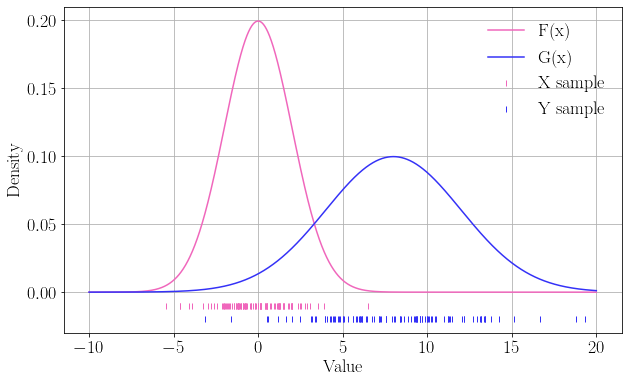

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import rcParams
rcParams['font.family']='Times New Roman'
rcParams['font.size']=18
rcParams['text.usetex']=True

# Plot between -10 and 20 with .001 steps.
x_axis = np.arange(-10, 20, 0.001)
f_mean=0; f_sd = 2.
g_mean = 8; g_sd = 4.

X = np.random.normal(f_mean, f_sd, 100)
Y = np.random.normal(g_mean, g_sd, 100)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, norm.pdf(x_axis,f_mean, f_sd), color='#F067BC',label="F(x)")
ax.plot(x_axis, norm.pdf(x_axis,g_mean,g_sd), color='#3431F7',label="G(x)")
ax.plot(X, np.full_like(X, -0.01),'|', color='#F067BC',label="X sample")
ax.plot(Y, np.full_like(Y, -0.02),'|', color='#3431F7',label="Y sample")
ax.set_xlabel('Value')
ax.set_ylabel('Density')
plt.ylim(-0.03, 0.21)
plt.legend(frameon=False)
plt.grid()
plt.show()


Let $n=n1+n2$, $\Omega_1 = \{1,2,3,\cdots,n1\}$, $\Omega_2 = \{n1+1, n1+2, n1+3,\cdots,n\}$，
$Z_i=X_i, i \in \Omega_1; = Y_{i-n1}, i \in \Omega_2$.

![twosample_z.png](Fig/twosample_z.png)

Following the indicator proposed by <cite>[J. Friedman, 74][1]</cite>, the two point testing is to calculate the number of points $C_i$ among the $k$ nearest neighbors of each point in $Z$, originating from class $X$.


[1]: https://www.semanticscholar.org/paper/A-NONPARAMETRIC-PROCEDURE-FOR-COMPARING-POINT-SETS-Friedman/595fbbae6a73eb940fe6fed443b61173f267e72c

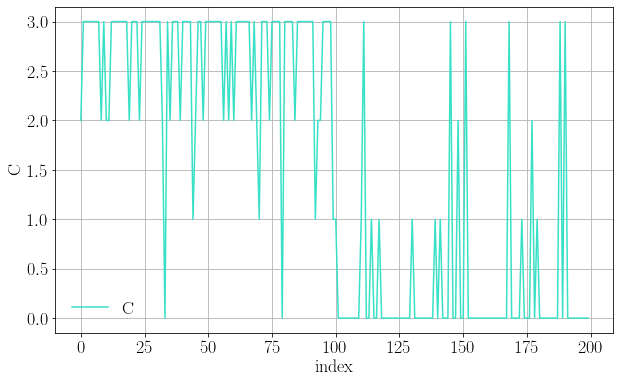

In [2]:
from sklearn.neighbors import NearestNeighbors
Z = np.concatenate([X, Y])
Omega_1 = [i for i in range(len(X))]
Omega_2 = [len(X)+i for i in range(len(Y))]

x_axis = np.arange(len(Z))

nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(Z.reshape(-1, 1))
distances, indices = nbrs.kneighbors(Z.reshape(-1, 1))

C = []
for x in indices:
    tmp = 0
    for idx in x[1:]:
        if idx in Omega_1:
            tmp += 1
    C.append(tmp)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, C, color='#38E0C7',label="C")
ax.set_xlabel('index')
ax.set_ylabel('C')
plt.legend(frameon=False)
plt.grid()
plt.show()


In this example, we derive the 3 nearest neighbors for each point in $Z_i$, and calculate the $C_i$ indicator.

To do the two sample test, we calculate $\{C_i, i\in \Omega_1\}$ and $\{C_i, i\in \Omega_2\}$, respectively

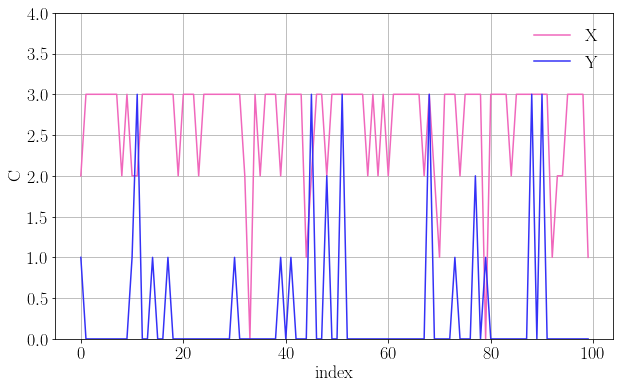

In [3]:
x_x_axis = np.arange(len(X))
distances, indices = nbrs.kneighbors(X.reshape(-1, 1))

C_o1 = []
for x in indices:
    tmp = 0
    for idx in x[1:]:
        if idx in Omega_1:
            tmp += 1
    C_o1.append(tmp)

x_y_axis = np.arange(len(Y))
distances, indices = nbrs.kneighbors(Y.reshape(-1, 1))

C_o2 = []
for x in indices:
    tmp = 0
    for idx in x[1:]:
        if idx in Omega_1:
            tmp += 1
    C_o2.append(tmp)
    
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_x_axis, C_o1, color='#F067BC',label="X")
ax.plot(x_y_axis, C_o2, color='#3431F7',label="Y")
ax.set_xlabel('index')
ax.set_ylabel('C')
plt.legend(frameon=False)
plt.ylim(0, 4)
plt.grid()
plt.show()

The hypotheses of the two-sample test can be stated as follows:
$$\left\{
\begin{aligned}
H_0 & : & F=G \\
H_1 & , & F\neq G
\end{aligned}.
\right.$$

If $H_1$ is true, the probabilistic distributions of $\{C_i, i\in \Omega_1\}$ and $\{C_i, i\in \Omega_2\}$ are different.

In [4]:
from scipy import stats
stats.ttest_ind(C_o1, C_o2)

Ttest_indResult(statistic=22.94690050321439, pvalue=1.1067203086697443e-57)

t-value measures the size of the difference relative to the variation in your sample data.
The greater the magnitude of T, the greater the evidence against the null hypothesis.

p-value is the probability we get this sample or a more extreme sample under H0. 
If p-value is less than 0.05, we can reject $H_0$